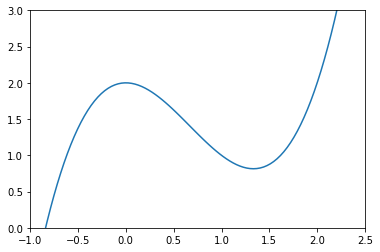

local  min occurs at: 1.3334253508453249
Number of steps: 17


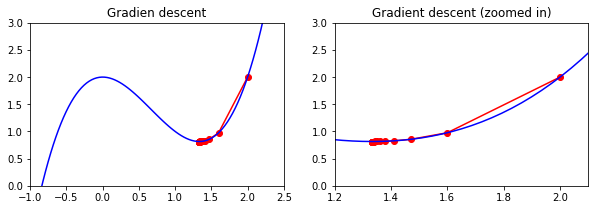

In [20]:
import numpy as np
from matplotlib import pyplot as plt

f= lambda x: x**3 -2*x**2 +2
x= np.linspace (-1, 2.5, 100)
plt.plot(x, f(x))
plt.xlim([-1, 2.5])
plt.ylim([0, 3])
plt.show()

x_old =0
x_new =2
n_k =0.1
precision =0.0001
x_list, y_list=[x_new], [f(x_new)]
#return the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x
while abs (x_new - x_old )> precision:
    x_old =x_new
    s_k= -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append (x_new)
    y_list.append(f(x_new))
print ("local  min occurs at:", x_new)
print("Number of steps:", len(x_list))
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x_list, y_list,c="r")
plt.plot(x_list, y_list,c="r")
plt.plot(x, f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title ("Gradien descent")
plt.subplot(1,2,2)
plt.scatter(x_list, y_list,c="r")
plt.plot(x_list, y_list,c="r")
plt.plot(x, f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,3])
plt.title("Gradient descent (zoomed in)")
plt.show()


In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv(r"C:\Users\bidahsamia\Desktop\homeprices_banglore.csv")
df.sample(5)
#Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

print(scaled_X)
print(scaled_y)

[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]
[[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]


# batch_gradient_descent

2
20
[0.70712464 0.67456527] -0.23034857438407427 0.0068641890429808105
prediction 128.45484403267596
prediction 30.253094462442355
prediction 69.47860785714694


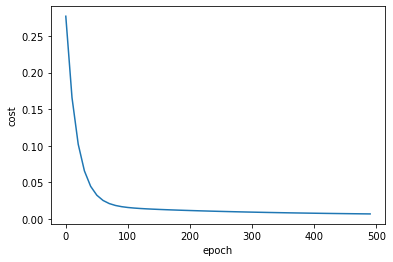

In [31]:
#batch_gradient_descent
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    print(number_of_features)
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    print(total_samples)
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        #clacul new w &b 
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
print(w, b, cost)
#Now plot epoch vs cost graph to see how cost reduces as number of epoch increases
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

print("prediction",predict(2600,4,w,b))
print("prediction",predict(1000,2,w,b))
print("prediction",predict(1500,3,w,b))




# stochastic_gradient_descent

[0.70581432 0.67355786] -0.22919019401643181 0.00970373777221415
[0.70712464 0.67456527] -0.23034857438407427
prediction 128.39942975846785
prediction 30.36327639218123
prediction 69.52429102595264


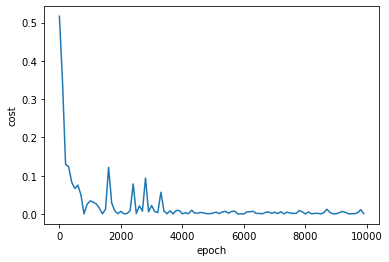

In [33]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
print(w_sgd, b_sgd, cost_sgd)
#Compare this with weights and bias that we got using gradient descent. They both of quite similar.

print(w, b)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)
print("prediction",predict(2600,4,w_sgd, b_sgd))
print("prediction",predict(1000,2,w_sgd, b_sgd))
print("prediction",predict(1500,3,w_sgd, b_sgd))


# mini_batch_gradient_descent

[0.71004076 0.67815426] -0.23350934384699143 0.008644310198011776
128.63587666825026
29.97466924509628
69.38918643310484


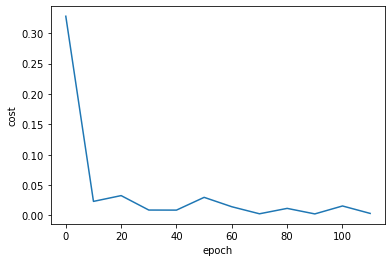

In [30]:
np.random.permutation(20)
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5)
print(w, b, cost)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)
print(predict(2600,4,w,b))
print(predict(1000,2,w,b))
print(predict(1500,3,w,b))
